# 🔬 COMPREHENSIVE MACHINE LEARNING FOR BIOMEDICAL STUDENTS

---

## 📚 **Welcome to Your ML Journey!**

This interactive notebook provides complete hands-on training in Machine Learning with **biomedical applications**.

### **What You'll Learn:**
- ✅ Exploratory Data Analysis (EDA)
- ✅ Supervised Learning (Classification & Regression)
- ✅ Unsupervised Learning (Clustering & Dimensionality Reduction)
- ✅ Reinforcement Learning (Q-Learning)
- ✅ Model Evaluation & Comparison
- ✅ Hyperparameter Tuning

### **How to Use This Notebook:**
1. Run each cell in order (Shift + Enter)
2. Read the markdown explanations carefully
3. Examine the outputs and visualizations
4. Experiment by modifying the code
5. Take notes on key concepts

### **Estimated Time:** 90 minutes to run all cells

---

**⚠️ Note:** This uses synthetic biomedical data created for educational purposes. Never use real patient data without proper ethical approval and compliance with HIPAA/GDPR regulations.

---

## 📦 **SECTION 0: Setup and Imports**

First, we'll import all necessary libraries. 

**Make sure you have them installed:**
```bash
pip install numpy pandas matplotlib seaborn scikit-learn
```

This cell may take a few seconds to run.

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score,
                             roc_curve, roc_auc_score, silhouette_score)

# Supervised Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Unsupervised Learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Settings
warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn is ready!")
print("\n🎉 You're all set to start learning Machine Learning!")

✅ All libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn is ready!

🎉 You're all set to start learning Machine Learning!


---

# 📊 **SECTION 1: Creating Biomedical Datasets**

We'll create three realistic biomedical datasets:

1. **Patient Disease Dataset** - For classification (predicting disease)
   - 1,000 patients with clinical measurements
   - Target: Disease (Yes/No)
   
2. **Drug Response Dataset** - For regression (predicting treatment response)
   - 500 patients with drug response data
   - Target: Response percentage (0-100%)
   
3. **Gene Expression Dataset** - For clustering (finding patient groups)
   - 200 patients with 50 gene expression levels
   - Goal: Discover hidden patient subgroups

These datasets simulate real medical scenarios but are completely synthetic for educational use.

**Why synthetic data?**
- No privacy concerns
- Controlled and reproducible
- Perfect for learning
- Can be shared freely

## 1.1 Patient Disease Dataset

This dataset contains patient clinical measurements and disease status.

**Features:**
- **Demographics:** Age, Gender
- **Clinical:** BMI, Blood Pressure, Glucose, Cholesterol, HbA1c, Heart Rate
- **Lifestyle:** Smoking status, Family history, Exercise habits

**Target:** Disease (0=No, 1=Yes)

**Medical Context:** This simulates a cardiovascular disease prediction scenario where we want to identify patients at risk.

In [2]:
def create_patient_data(n_samples=1000):
    """
    Create dummy patient dataset for disease prediction
    """
    np.random.seed(42)
    
    # Patient demographics
    age = np.random.normal(55, 15, n_samples).astype(int)
    age = np.clip(age, 18, 90)
    
    gender = np.random.choice(['Male', 'Female'], n_samples)
    
    # Clinical measurements
    bmi = np.random.normal(27, 5, n_samples)
    bmi = np.clip(bmi, 15, 45)
    
    bp_systolic = np.random.normal(130, 20, n_samples)
    bp_systolic = np.clip(bp_systolic, 90, 200)
    
    glucose = np.random.normal(110, 30, n_samples)
    glucose = np.clip(glucose, 70, 250)
    
    cholesterol = np.random.normal(200, 40, n_samples)
    cholesterol = np.clip(cholesterol, 120, 350)
    
    hba1c = np.random.normal(6.0, 1.5, n_samples)
    hba1c = np.clip(hba1c, 4.0, 12.0)
    
    heart_rate = np.random.normal(75, 12, n_samples)
    heart_rate = np.clip(heart_rate, 50, 120)
    
    # Lifestyle factors
    smoking = np.random.choice(['Never', 'Former', 'Current'], n_samples, 
                               p=[0.5, 0.3, 0.2])
    family_history = np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
    exercise = np.random.exponential(2, n_samples)
    exercise = np.clip(exercise, 0, 15)
    
    # Create disease risk score (complex function of features)
    risk_score = (
        0.3 * (age - 18) / 72 +
        0.2 * (bmi - 15) / 30 +
        0.15 * (bp_systolic - 90) / 110 +
        0.15 * (glucose - 70) / 180 +
        0.1 * (cholesterol - 120) / 230 +
        0.05 * (hba1c - 4.0) / 8.0 +
        0.05 * family_history -
        0.05 * exercise / 15 +
        0.1 * (smoking == 'Current').astype(int) +
        np.random.normal(0, 0.1, n_samples)
    )
    
    # Create binary disease outcome
    disease_probability = 1 / (1 + np.exp(-5 * (risk_score - 0.5)))
    disease = (np.random.random(n_samples) < disease_probability).astype(int)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Gender': gender,
        'BMI': bmi.round(1),
        'BP_Systolic': bp_systolic.round(0),
        'Glucose': glucose.round(0),
        'Cholesterol': cholesterol.round(0),
        'HbA1c': hba1c.round(1),
        'Heart_Rate': heart_rate.round(0),
        'Smoking': smoking,
        'Family_History': family_history,
        'Exercise_Hours_Week': exercise.round(1),
        'Disease': disease
    })
    
    return df

# Create the dataset
patient_df = create_patient_data(1000)

print("✅ Patient Disease Dataset Created!")
print(f"\nDataset shape: {patient_df.shape}")
print(f"  - {patient_df.shape[0]} patients (rows)")
print(f"  - {patient_df.shape[1]} features (columns)")
print(f"\nFirst 5 patients:")
display(patient_df.head())

print(f"\nDataset saved as: patient_disease_data.csv")
patient_df.to_csv('patient_disease_data.csv', index=False)

✅ Patient Disease Dataset Created!

Dataset shape: (1000, 12)
  - 1000 patients (rows)
  - 12 features (columns)

First 5 patients:


,Age,Gender,BMI,BP_Systolic,Glucose,Cholesterol,HbA1c,Heart_Rate,Smoking,Family_History,Exercise_Hours_Week,Disease
0,62,Male,25.2,128.0,169.0,234.0,4.0,64.0,Never,0,0.6,0
1,52,Female,27.9,101.0,70.0,146.0,7.2,85.0,Former,0,2.6,0
2,64,Male,20.3,112.0,125.0,164.0,6.4,76.0,Former,1,1.1,0
3,77,Female,22.1,110.0,155.0,161.0,7.1,60.0,Current,0,8.0,1
4,51,Male,33.0,134.0,178.0,243.0,4.0,86.0,Former,0,0.9,0



Dataset saved as: patient_disease_data.csv


## 1.2 Drug Response Dataset

This dataset predicts how well patients respond to a drug (regression problem).

**Features:**
- **Patient characteristics:** Age, Weight
- **Organ function:** Kidney function (eGFR), Liver enzymes (ALT)
- **Treatment:** Dosage (mg)
- **Genetics:** Genetic marker (0, 1, or 2 - represents genotype variants)

**Target:** Drug Response (% improvement, 0-100%)

**Medical Context:** This simulates personalized medicine where we predict treatment response based on patient characteristics and genetics.

In [3]:
def create_drug_response_data(n_samples=500):
    """
    Create dummy drug response dataset for regression
    """
    np.random.seed(42)
    
    # Patient characteristics
    age = np.random.normal(50, 15, n_samples)
    age = np.clip(age, 18, 85)
    
    weight = np.random.normal(75, 15, n_samples)
    weight = np.clip(weight, 45, 120)
    
    # Organ function
    kidney_function = np.random.normal(90, 20, n_samples)  # eGFR
    kidney_function = np.clip(kidney_function, 30, 120)
    
    liver_enzymes = np.random.normal(30, 10, n_samples)  # ALT
    liver_enzymes = np.clip(liver_enzymes, 10, 80)
    
    # Treatment
    dosage = np.random.choice([50, 100, 150, 200], n_samples)
    
    # Genetics (0, 1, 2 variants)
    genetic_marker = np.random.choice([0, 1, 2], n_samples, p=[0.25, 0.5, 0.25])
    
    # Drug response (% improvement) - complex relationship
    response = (
        20 +  # baseline
        0.3 * dosage +
        0.2 * kidney_function +
        -0.3 * age +
        0.1 * weight +
        -0.2 * liver_enzymes +
        10 * genetic_marker +
        np.random.normal(0, 8, n_samples)  # noise
    )
    
    response = np.clip(response, 0, 100)
    
    df = pd.DataFrame({
        'Age': age.round(0),
        'Weight_kg': weight.round(1),
        'Kidney_Function_eGFR': kidney_function.round(0),
        'Liver_Enzymes_ALT': liver_enzymes.round(0),
        'Dosage_mg': dosage,
        'Genetic_Marker': genetic_marker,
        'Drug_Response_Percent': response.round(1)
    })
    
    return df

# Create the dataset
drug_df = create_drug_response_data(500)

print("✅ Drug Response Dataset Created!")
print(f"\nDataset shape: {drug_df.shape}")
print(f"\nFirst 5 rows:")
display(drug_df.head())

print(f"\n💡 Key insight: Genetic marker strongly influences response!")
print(f"   Average response by genetic marker:")
print(drug_df.groupby('Genetic_Marker')['Drug_Response_Percent'].mean())

drug_df.to_csv('drug_response_data.csv', index=False)

✅ Drug Response Dataset Created!

Dataset shape: (500, 7)

First 5 rows:


,Age,Weight_kg,Kidney_Function_eGFR,Liver_Enzymes_ALT,Dosage_mg,Genetic_Marker,Drug_Response_Percent
0,57.0,88.9,118.0,38.0,100,2,87.3
1,48.0,103.6,108.0,24.0,150,0,73.9
2,60.0,54.0,91.0,22.0,100,2,56.4
3,73.0,83.4,77.0,30.0,150,2,85.9
4,46.0,65.2,104.0,28.0,150,2,87.6



💡 Key insight: Genetic marker strongly influences response!
   Average response by genetic marker:
Genetic_Marker
0    61.384921
1    71.367578
2    81.058475
Name: Drug_Response_Percent, dtype: float64


## 1.3 Gene Expression Dataset

This dataset contains gene expression levels for clustering analysis.

**Features:** 50 gene expression levels (Gene_1 through Gene_50)  
**Patients:** 200  
**Goal:** Identify patient subgroups (unsupervised clustering)

**Medical Context:** This simulates cancer subtype discovery based on gene expression profiles. Different subtypes may require different treatments.

In [4]:
def create_gene_expression_data(n_samples=200, n_genes=50):
    """
    Create dummy gene expression dataset for clustering
    """
    np.random.seed(42)
    
    # Create 3 distinct patient groups with different expression patterns
    group_size = n_samples // 3
    
    # Group 1: High expression of first 20 genes
    group1 = np.random.normal(8, 1, (group_size, n_genes))
    group1[:, :20] += 3
    
    # Group 2: High expression of middle 20 genes
    group2 = np.random.normal(8, 1, (group_size, n_genes))
    group2[:, 15:35] += 3
    
    # Group 3: High expression of last 20 genes
    group3 = np.random.normal(8, 1, (n_samples - 2*group_size, n_genes))
    group3[:, 30:] += 3
    
    # Combine groups
    gene_data = np.vstack([group1, group2, group3])
    
    # Create DataFrame
    gene_names = [f'Gene_{i+1}' for i in range(n_genes)]
    df = pd.DataFrame(gene_data, columns=gene_names)
    
    # Add patient IDs and true labels (for evaluation only)
    df.insert(0, 'Patient_ID', [f'P{i+1:03d}' for i in range(n_samples)])
    true_labels = np.array([0]*group_size + [1]*group_size + [2]*(n_samples - 2*group_size))
    df['True_Group'] = true_labels
    
    return df

# Create the dataset
gene_df = create_gene_expression_data(200, 50)

print("✅ Gene Expression Dataset Created!")
print(f"\nDataset shape: {gene_df.shape}")
print(f"\nFirst few genes for first 5 patients:")
display(gene_df.iloc[:5, :8])

print(f"\n💡 This dataset has 3 hidden patient groups")
print(f"   Group distribution:")
print(gene_df['True_Group'].value_counts().sort_index())

gene_df.to_csv('gene_expression_data.csv', index=False)

✅ Gene Expression Dataset Created!

Dataset shape: (200, 52)

First few genes for first 5 patients:


,Patient_ID,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7
0,P001,11.496714,10.861736,11.647689,12.523030,10.765847,10.765863,12.579213
1,P002,11.324084,10.614918,10.323078,11.611676,12.031000,11.931280,10.160782
2,P003,9.584629,10.579355,10.657285,10.197723,10.838714,11.404051,12.886186
3,P004,11.250493,11.346448,10.319975,11.232254,11.293072,10.285649,12.865775
4,P005,11.357787,11.560785,12.083051,12.053802,9.622331,10.062175,11.515035



💡 This dataset has 3 hidden patient groups
   Group distribution:
True_Group
0    66
1    66
2    68
Name: count, dtype: int64


## 1.4 Datasets Summary

**✅ All three datasets created successfully!**

| Dataset | Samples | Features | Task | Medical Application |
|---------|---------|----------|------|---------------------|
| Patient Disease | 1,000 | 11 | Classification | Disease prediction |
| Drug Response | 500 | 6 | Regression | Treatment optimization |
| Gene Expression | 200 | 50 | Clustering | Subtype discovery |

All datasets have been saved as CSV files for future use.

---

# 📈 **SECTION 2: Exploratory Data Analysis (EDA)**

Before building any ML model, we MUST understand our data!

**EDA helps us:**
- Understand feature distributions
- Identify outliers and missing values
- Discover relationships between variables
- Make informed decisions about preprocessing
- Generate hypotheses

**Remember:** "Garbage in = garbage out"  
Good EDA is the foundation of successful ML projects!

Let's explore the Patient Disease dataset in detail.

## 2.1 Basic Dataset Information

Let's start with the basics: what does our data look like?

In [5]:
print("=" * 80)
print("PATIENT DISEASE DATASET - BASIC INFORMATION")
print("=" * 80)

print(f"\n📊 Dataset Shape: {patient_df.shape}")
print(f"   - {patient_df.shape[0]} patients (rows)")
print(f"   - {patient_df.shape[1]} features (columns)")

print("\n📋 Column Names and Types:")
display(patient_df.dtypes)

print("\n📊 First 10 rows:")
display(patient_df.head(10))

PATIENT DISEASE DATASET - BASIC INFORMATION

📊 Dataset Shape: (1000, 12)
   - 1000 patients (rows)
   - 12 features (columns)

📋 Column Names and Types:


Age                      int32
Gender                  object
BMI                    float64
BP_Systolic            float64
Glucose                float64
Cholesterol            float64
HbA1c                  float64
Heart_Rate             float64
Smoking                 object
Family_History           int32
Exercise_Hours_Week    float64
Disease                  int32
dtype: object


📊 First 10 rows:


,Age,Gender,BMI,BP_Systolic,Glucose,Cholesterol,HbA1c,Heart_Rate,Smoking,Family_History,Exercise_Hours_Week,Disease
0,62,Male,25.2,128.0,169.0,234.0,4.0,64.0,Never,0,0.6,0
1,52,Female,27.9,101.0,70.0,146.0,7.2,85.0,Former,0,2.6,0
2,64,Male,20.3,112.0,125.0,164.0,6.4,76.0,Former,1,1.1,0
3,77,Female,22.1,110.0,155.0,161.0,7.1,60.0,Current,0,8.0,1
4,51,Male,33.0,134.0,178.0,243.0,4.0,86.0,Former,0,0.9,0
5,51,Male,23.7,131.0,98.0,238.0,6.5,58.0,Former,0,5.1,0
6,78,Male,21.8,116.0,125.0,219.0,4.2,79.0,Former,0,5.4,1
7,66,Male,29.7,134.0,127.0,243.0,5.4,65.0,Never,1,0.6,1
8,47,Female,32.9,119.0,116.0,165.0,6.8,71.0,Never,0,3.2,1
9,63,Male,30.6,125.0,107.0,214.0,6.1,81.0,Current,0,1.1,0


In [6]:
print("\n📈 Statistical Summary:")
display(patient_df.describe())

print("\n💡 Key observations from statistics:")
print("   - Age ranges from 18 to 90 years")
print("   - BMI average is 27.2 (slightly overweight)")
print("   - Mean blood pressure is 130 (borderline high)")
print("   - Glucose mean is 110 mg/dL (normal)")


📈 Statistical Summary:


,Age,BMI,BP_Systolic,Glucose,Cholesterol,HbA1c,Heart_Rate,Family_History,Exercise_Hours_Week,Disease
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.766000,27.163800,130.213000,110.184000,199.709000,6.025400,74.757000,0.319000,2.075400,0.383000
std,14.471028,4.879691,19.755047,27.585161,38.638106,1.397644,12.322329,0.466322,2.164574,0.486362
min,18.000000,15.000000,90.000000,70.000000,120.000000,4.000000,50.000000,0.000000,0.000000,0.000000
25%,45.000000,23.900000,116.000000,89.000000,173.000000,5.000000,66.000000,0.000000,0.600000,0.000000
50%,55.000000,27.100000,130.000000,109.000000,200.000000,5.900000,75.000000,0.000000,1.300000,0.000000
75%,64.000000,30.400000,144.000000,128.000000,226.250000,7.000000,83.000000,1.000000,2.925000,1.000000
max,90.000000,43.000000,200.000000,207.000000,325.000000,10.600000,117.000000,1.000000,14.600000,1.000000



💡 Key observations from statistics:
   - Age ranges from 18 to 90 years
   - BMI average is 27.2 (slightly overweight)
   - Mean blood pressure is 130 (borderline high)
   - Glucose mean is 110 mg/dL (normal)



🔍 Missing Values Check:


'✅ No missing values!'


🎯 Target Variable (Disease) Distribution:
Disease
0    617
1    383
Name: count, dtype: int64

Disease Prevalence: 38.3%


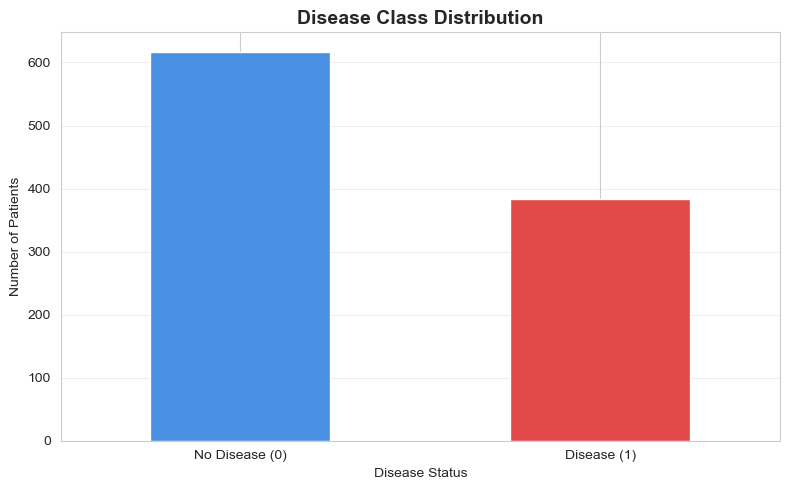


💡 Class Balance: 62% healthy, 38% diseased
   This is moderately imbalanced - we should monitor this in model evaluation


In [7]:
print("\n🔍 Missing Values Check:")
missing = patient_df.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values!")

print("\n🎯 Target Variable (Disease) Distribution:")
disease_counts = patient_df['Disease'].value_counts()
print(disease_counts)
print(f"\nDisease Prevalence: {patient_df['Disease'].mean()*100:.1f}%")

# Visualize
plt.figure(figsize=(8, 5))
disease_counts.plot(kind='bar', color=['#4A90E2', '#E24A4A'])
plt.title('Disease Class Distribution', fontsize=14, weight='bold')
plt.xlabel('Disease Status')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Class Balance: 62% healthy, 38% diseased")
print("   This is moderately imbalanced - we should monitor this in model evaluation")

## 2.2 Feature Distributions

Understanding how each feature is distributed helps us identify:
- Normal vs skewed distributions
- Outliers
- Data quality issues
- Transformation needs

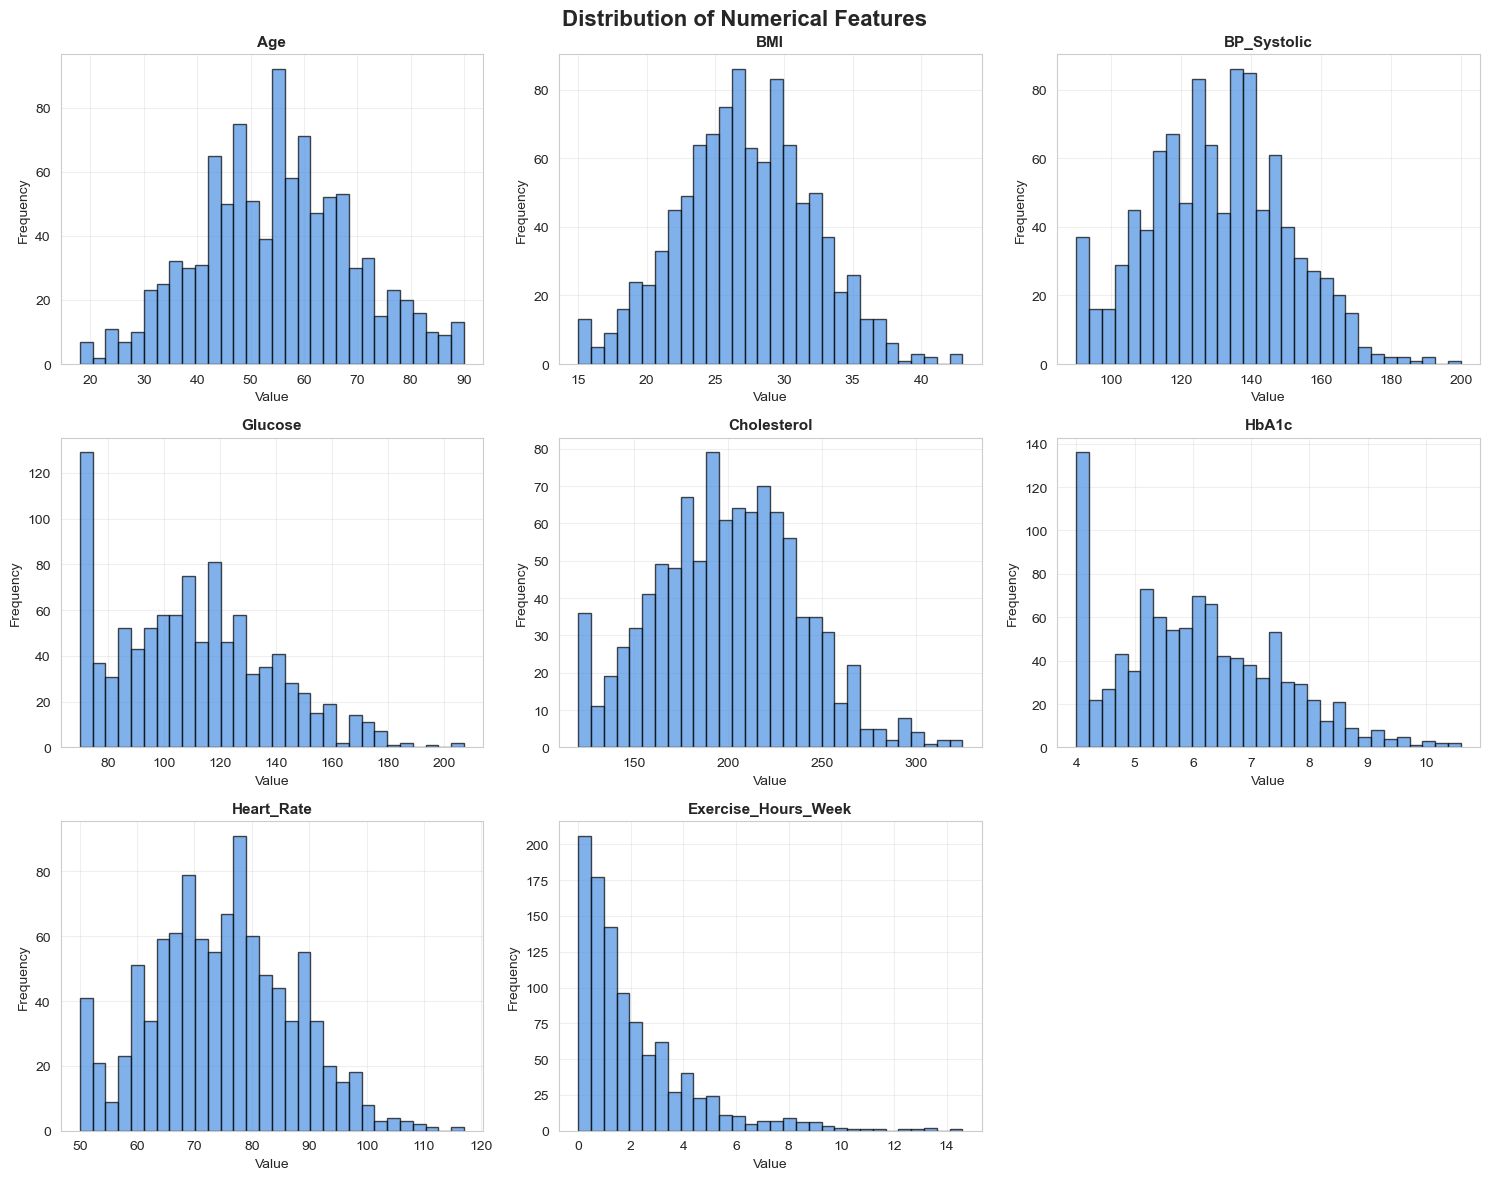


💡 Observations:
   - Most features follow approximately normal distributions
   - Exercise hours shows exponential distribution (common for activity)
   - No obvious outliers or data quality issues


In [8]:
# Plot distributions
numerical_cols = ['Age', 'BMI', 'BP_Systolic', 'Glucose', 'Cholesterol', 
                  'HbA1c', 'Heart_Rate', 'Exercise_Hours_Week']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, weight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].hist(patient_df[col], bins=30, edgecolor='black', 
                            alpha=0.7, color='#4A90E2')
    axes[row, col_idx].set_title(col, fontsize=11, weight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

fig.delaxes(axes[2, 2])  # Remove empty subplot
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("   - Most features follow approximately normal distributions")
print("   - Exercise hours shows exponential distribution (common for activity)")
print("   - No obvious outliers or data quality issues")

## 2.3 Correlation Analysis

Correlations help us understand:
- Which features are related to the target
- Redundant features (multicollinearity)
- Unexpected relationships

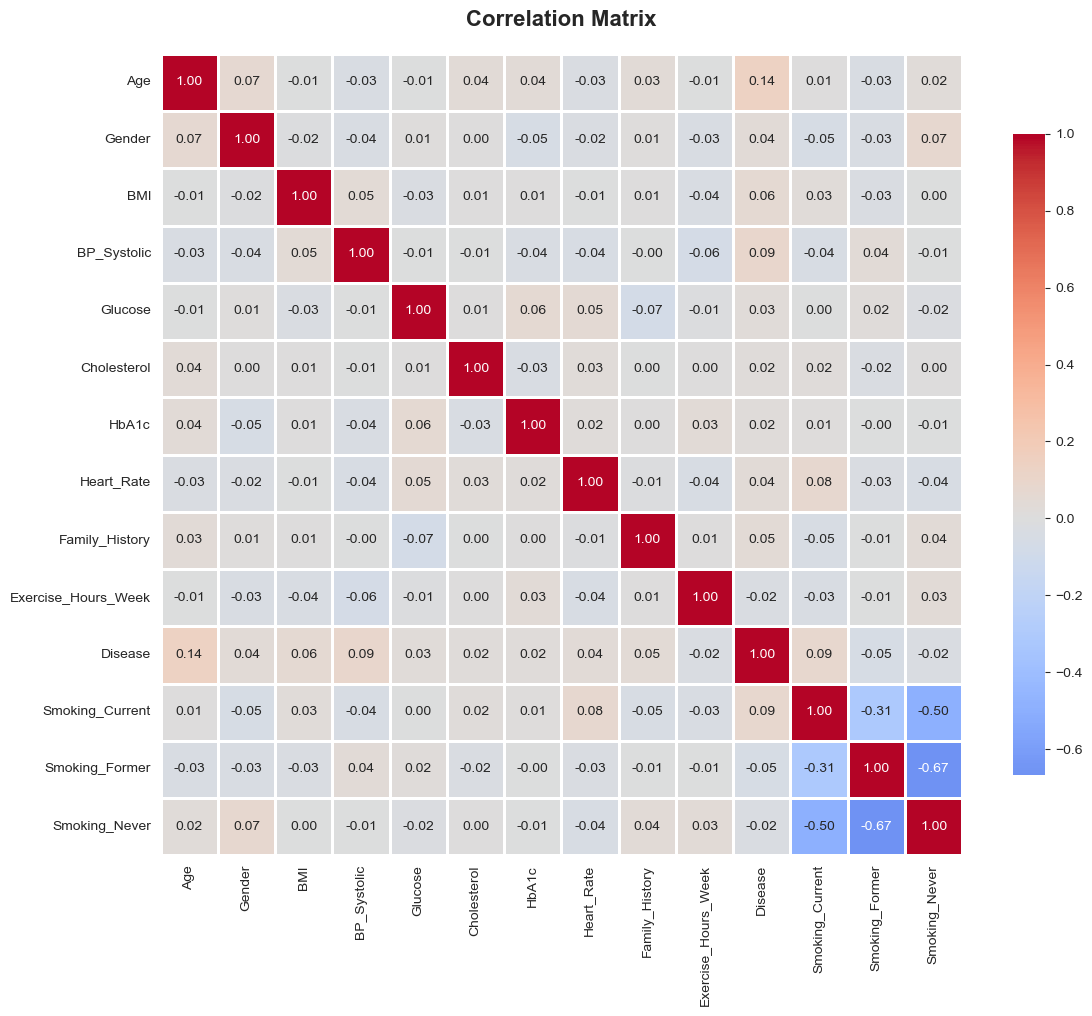


💡 Key Correlations with Disease:
Age                0.137762
BP_Systolic        0.090266
Smoking_Current    0.087290
BMI                0.060088
Family_History     0.047768
Gender             0.039971
Heart_Rate         0.037091
Glucose            0.029212
Name: Disease, dtype: float64


In [9]:
# Encode categorical variables for correlation
df_encoded = patient_df.copy()
df_encoded['Gender'] = (df_encoded['Gender'] == 'Male').astype(int)
smoking_encoded = pd.get_dummies(df_encoded['Smoking'], prefix='Smoking')
df_encoded = pd.concat([df_encoded.drop('Smoking', axis=1), smoking_encoded], axis=1)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Key Correlations with Disease:")
disease_corr = correlation_matrix['Disease'].sort_values(ascending=False)
print(disease_corr[disease_corr.index != 'Disease'].head(8))

---

# 🎯 **SECTION 3: Supervised Learning - CLASSIFICATION**

**Goal:** Predict if a patient has disease (binary classification)

**Algorithms we'll compare:**
1. Logistic Regression
2. Decision Tree
3. Random Forest  
4. K-Nearest Neighbors
5. Support Vector Machine
6. Naive Bayes
7. Gradient Boosting

**Key Concept:** We'll train multiple models and compare them using appropriate metrics.

## 3.1 Data Preparation

**Critical steps:**
1. Separate features (X) and target (y)
2. Encode categorical variables
3. Split into train/test sets (80/20)
4. Scale features (for distance-based algorithms)

In [10]:
print("="*80)
print("DATA PREPARATION FOR CLASSIFICATION")
print("="*80)

# Separate features and target
X = patient_df.drop(['Disease'], axis=1)
y = patient_df['Disease']

# Encode categorical variables
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
X = pd.get_dummies(X, columns=['Smoking'], drop_first=True)

print(f"\n✓ Features (X) shape: {X.shape}")
print(f"✓ Target (y) shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

# Split data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Training set: {X_train.shape[0]} samples (80%)")
print(f"✓ Test set: {X_test.shape[0]} samples (20%)")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled (standardized)")
print("\n💡 Remember: Scaling is crucial for:")
print("   - Logistic Regression")
print("   - K-Nearest Neighbors")
print("   - Support Vector Machines")
print("   Tree-based models don't need scaling!")

DATA PREPARATION FOR CLASSIFICATION

✓ Features (X) shape: (1000, 12)
✓ Target (y) shape: (1000,)

Features: ['Age', 'Gender', 'BMI', 'BP_Systolic', 'Glucose', 'Cholesterol', 'HbA1c', 'Heart_Rate', 'Family_History', 'Exercise_Hours_Week', 'Smoking_Former', 'Smoking_Never']

✓ Training set: 800 samples (80%)
✓ Test set: 200 samples (20%)

✓ Features scaled (standardized)

💡 Remember: Scaling is crucial for:
   - Logistic Regression
   - K-Nearest Neighbors
   - Support Vector Machines
   Tree-based models don't need scaling!


## 3.2 Training Multiple Classification Models

We'll train 7 different algorithms and compare their performance.  
This typically takes 10-15 seconds.

In [11]:
print("Training classification models...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'Model': model,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

print("✅ All models trained!")

Training classification models...
✅ All models trained!


## 3.3 Model Comparison

**Understanding Metrics:**
- **Accuracy:** Overall correctness (can be misleading with imbalanced data)
- **Precision:** Of predicted positives, how many are correct? (minimize false alarms)
- **Recall:** Of actual positives, how many did we find? (minimize misses)
- **F1-Score:** Harmonic mean of precision and recall (balanced metric)
- **ROC-AUC:** Overall performance across all thresholds (0.5 to 1.0)

MODEL PERFORMANCE COMPARISON


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.610,0.4839,0.1948,0.2778,0.5849
1,Decision Tree,0.490,0.3188,0.2857,0.3014,0.4518
2,Random Forest,0.575,0.3750,0.1558,0.2202,0.5629
3,K-Nearest Neighbors,0.590,0.4419,0.2468,0.3167,0.5844
4,Support Vector Machine,0.585,0.3500,0.0909,0.1443,0.5873
5,Naive Bayes,0.600,0.4516,0.1818,0.2593,0.5604
6,Gradient Boosting,0.615,0.5000,0.2338,0.3186,0.5346



🏆 Best Model (by F1-Score): Gradient Boosting
   F1-Score: 0.3186


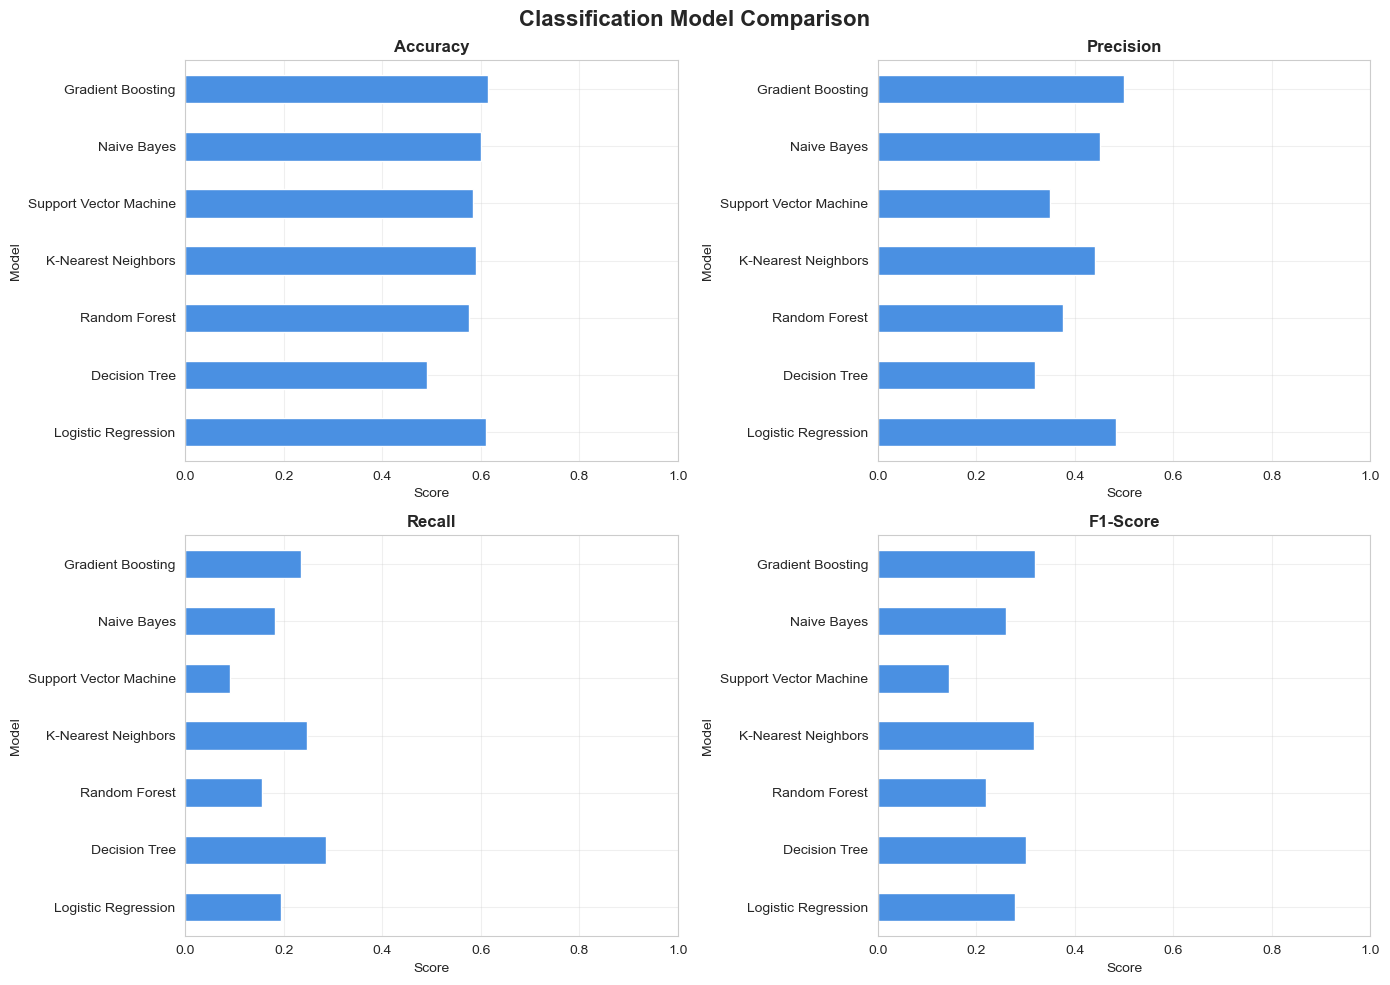

In [12]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'Precision': [results[m]['Precision'] for m in results],
    'Recall': [results[m]['Recall'] for m in results],
    'F1-Score': [results[m]['F1-Score'] for m in results],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results]
})

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
display(comparison_df.round(4))

best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model (by F1-Score): {best_model_name}")
print(f"   F1-Score: {comparison_df['F1-Score'].max():.4f}")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Classification Model Comparison', fontsize=16, weight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2
    comparison_df.plot(x='Model', y=metric, kind='barh', ax=axes[row, col],
                      legend=False, color='#4A90E2')
    axes[row, col].set_title(metric, fontsize=12, weight='bold')
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_xlim(0, 1)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.4 Confusion Matrix - Understanding Errors

**Confusion Matrix Layout:**
```
                 Predicted
                 No | Yes
Actual No:       TN | FP
Actual Yes:      FN | TP
```

- **TN (True Negative):** Correctly predicted no disease
- **FP (False Positive):** Healthy flagged as diseased (Type I error)
- **FN (False Negative):** Diseased patient missed (Type II error) ⚠️ DANGEROUS!
- **TP (True Positive):** Correctly identified disease

Confusion Matrix for Gradient Boosting:
[[105  18]
 [ 59  18]]

Breakdown:
  TN (True Negatives):  105 - Correctly identified healthy
  FP (False Positives): 18 - Healthy wrongly flagged
  FN (False Negatives): 59 - Diseased patients MISSED ⚠️
  TP (True Positives):  18 - Correctly identified diseased


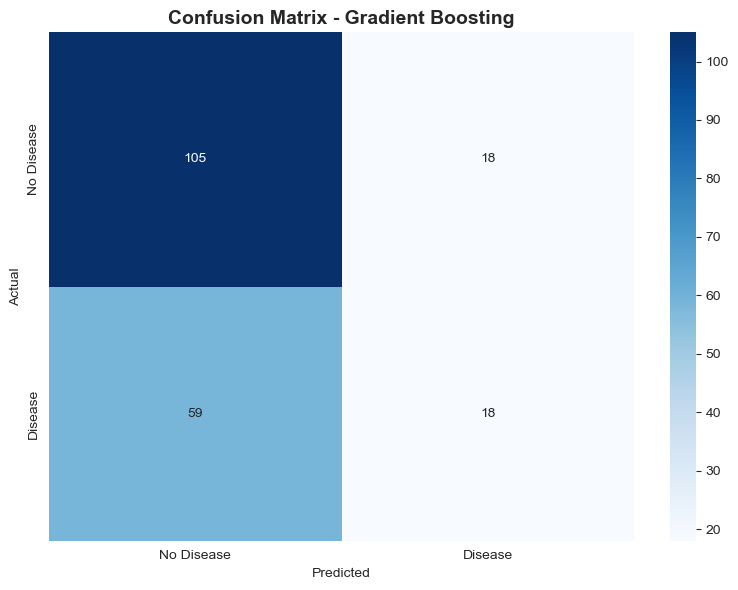


📊 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.64      0.85      0.73       123
     Disease       0.50      0.23      0.32        77

    accuracy                           0.61       200
   macro avg       0.57      0.54      0.53       200
weighted avg       0.59      0.61      0.57       200



In [13]:
# Get best model predictions
best_y_pred = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, best_y_pred)

print(f"Confusion Matrix for {best_model_name}:")
print(cm)
print(f"\nBreakdown:")
print(f"  TN (True Negatives):  {cm[0,0]} - Correctly identified healthy")
print(f"  FP (False Positives): {cm[0,1]} - Healthy wrongly flagged")
print(f"  FN (False Negatives): {cm[1,0]} - Diseased patients MISSED ⚠️")
print(f"  TP (True Positives):  {cm[1,1]} - Correctly identified diseased")

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, weight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📊 Classification Report:")
print(classification_report(y_test, best_y_pred, 
                          target_names=['No Disease', 'Disease']))

---

# 📉 **SECTION 4: Supervised Learning - REGRESSION**

**Goal:** Predict drug response percentage (continuous value 0-100%)

**Key Difference from Classification:**
- Classification: Predict categories (Yes/No, Type A/B/C)
- Regression: Predict numbers (price, percentage, quantity)

**Algorithms:** Linear, Ridge, Lasso, Decision Tree, Random Forest, KNN, SVR

In [14]:
# Prepare regression data
X_reg = drug_df.drop(['Drug_Response_Percent'], axis=1)
y_reg = drug_df['Drug_Response_Percent']

# Split and scale
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"✓ Regression data prepared: {X_reg.shape}")

# Train regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf')
}

reg_results = {}

for name, model in reg_models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
                'K-Nearest Neighbors', 'Support Vector Regression']:
        model.fit(X_train_reg_scaled, y_train_reg)
        y_pred_reg = model.predict(X_test_reg_scaled)
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred_reg = model.predict(X_test_reg)
    
    reg_results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)),
        'MAE': mean_absolute_error(y_test_reg, y_pred_reg),
        'R²': r2_score(y_test_reg, y_pred_reg),
        'y_pred': y_pred_reg
    }

print("✅ Regression models trained!")

# Display results
reg_comparison_df = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'RMSE': [reg_results[m]['RMSE'] for m in reg_results],
    'MAE': [reg_results[m]['MAE'] for m in reg_results],
    'R²': [reg_results[m]['R²'] for m in reg_results]
})

print("\n" + "="*80)
print("REGRESSION MODEL COMPARISON")
print("="*80)
display(reg_comparison_df.round(4))

best_reg_model = reg_comparison_df.loc[reg_comparison_df['R²'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_reg_model}")
print(f"   R² Score: {reg_comparison_df['R²'].max():.4f}")
print(f"   RMSE: {reg_comparison_df.loc[reg_comparison_df['R²'].idxmax(), 'RMSE']:.2f}%")

print("\n💡 Interpretation:")
print(f"   R² = {reg_comparison_df['R²'].max():.2f} means the model explains")
print(f"   {reg_comparison_df['R²'].max()*100:.0f}% of the variance in drug response")

✓ Regression data prepared: (500, 6)
✅ Regression models trained!

REGRESSION MODEL COMPARISON


,Model,RMSE,MAE,R²
0,Linear Regression,7.7350,6.3471,0.8565
1,Ridge Regression,7.7376,6.3486,0.8564
2,Lasso Regression,8.2361,6.5023,0.8373
3,Decision Tree,10.8206,8.3920,0.7192
4,Random Forest,8.4243,6.6545,0.8298
5,K-Nearest Neighbors,9.8236,8.1280,0.7686
6,Support Vector Regression,12.1301,9.6919,0.6471



🏆 Best Model: Linear Regression
   R² Score: 0.8565
   RMSE: 7.74%

💡 Interpretation:
   R² = 0.86 means the model explains
   86% of the variance in drug response


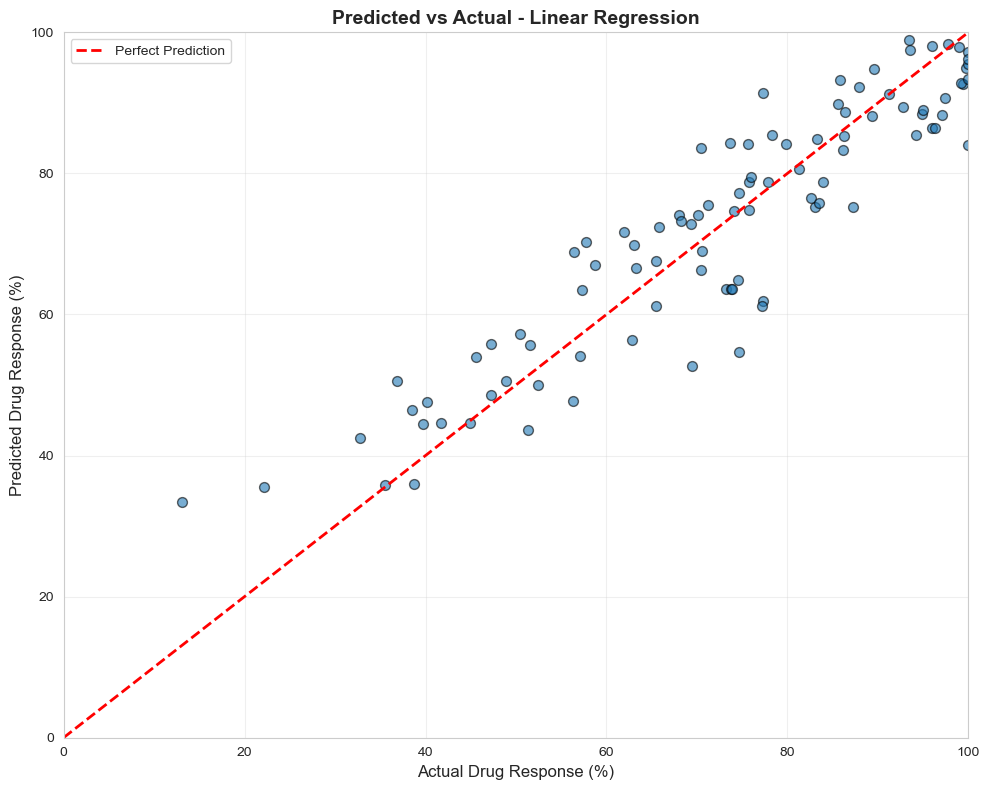


💡 Points closer to the red line indicate better predictions


In [15]:
# Visualize predictions vs actual
best_y_pred_reg = reg_results[best_reg_model]['y_pred']

plt.figure(figsize=(10, 8))
plt.scatter(y_test_reg, best_y_pred_reg, alpha=0.6, s=50, edgecolor='black')
plt.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Drug Response (%)', fontsize=12)
plt.ylabel('Predicted Drug Response (%)', fontsize=12)
plt.title(f'Predicted vs Actual - {best_reg_model}', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

print("\n💡 Points closer to the red line indicate better predictions")

---

# 🔍 **SECTION 5: Unsupervised Learning - CLUSTERING**

**Goal:** Discover hidden patient subgroups based on gene expression

**No labels provided!** The algorithm finds patterns on its own.

**Methods:**
- **PCA:** Reduce 50 genes to 2 dimensions for visualization
- **K-Means:** Partition patients into k clusters
- **Evaluation:** Compare discovered clusters to true groups

✓ Gene expression data: (200, 50)
  (200 patients × 50 genes)

✓ PCA completed
  Variance explained by 2 components: 68.5%


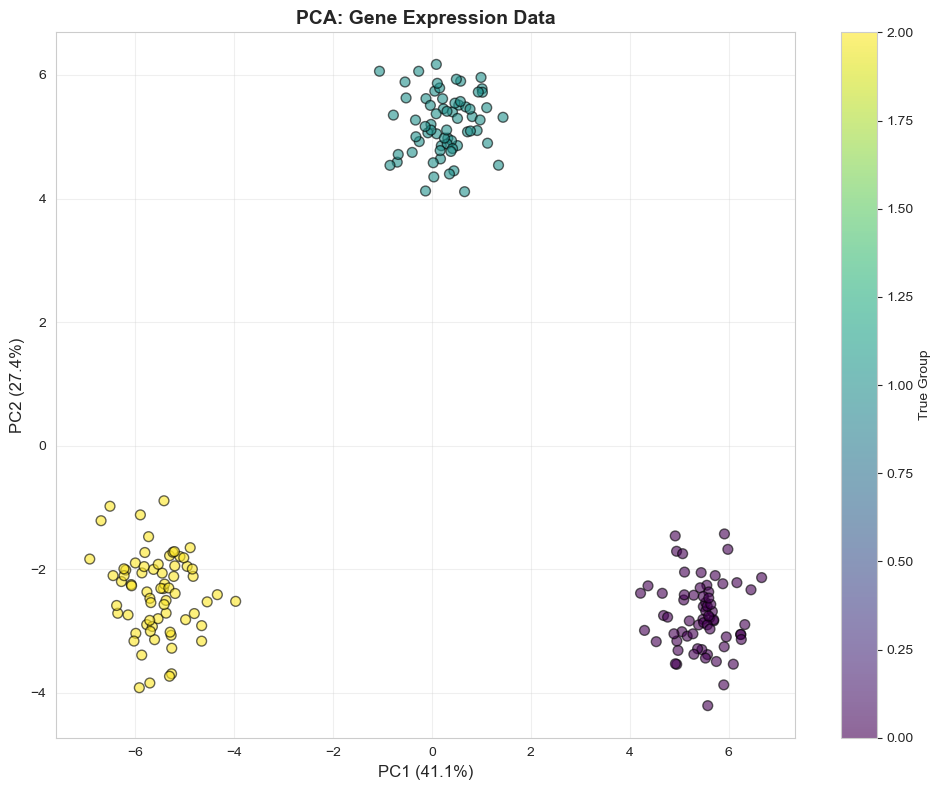


💡 Three distinct groups are visible!


In [16]:
# Prepare clustering data
X_cluster = gene_df.drop(['Patient_ID', 'True_Group'], axis=1)
true_labels = gene_df['True_Group'].values

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print(f"✓ Gene expression data: {X_cluster.shape}")
print(f"  ({X_cluster.shape[0]} patients × {X_cluster.shape[1]} genes)")

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

print(f"\n✓ PCA completed")
print(f"  Variance explained by 2 components: {pca.explained_variance_ratio_.sum():.1%}")

# Visualize PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, 
                     cmap='viridis', s=50, alpha=0.6, edgecolor='black')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('PCA: Gene Expression Data', fontsize=14, weight='bold')
plt.colorbar(scatter, label='True Group')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Three distinct groups are visible!")

✓ Optimal clusters: 3
  Silhouette score: 0.4793

📊 Clustering Quality:
  Adjusted Rand Index: 1.0000
  Normalized Mutual Info: 1.0000

💡 Scores close to 1.0 indicate excellent clustering


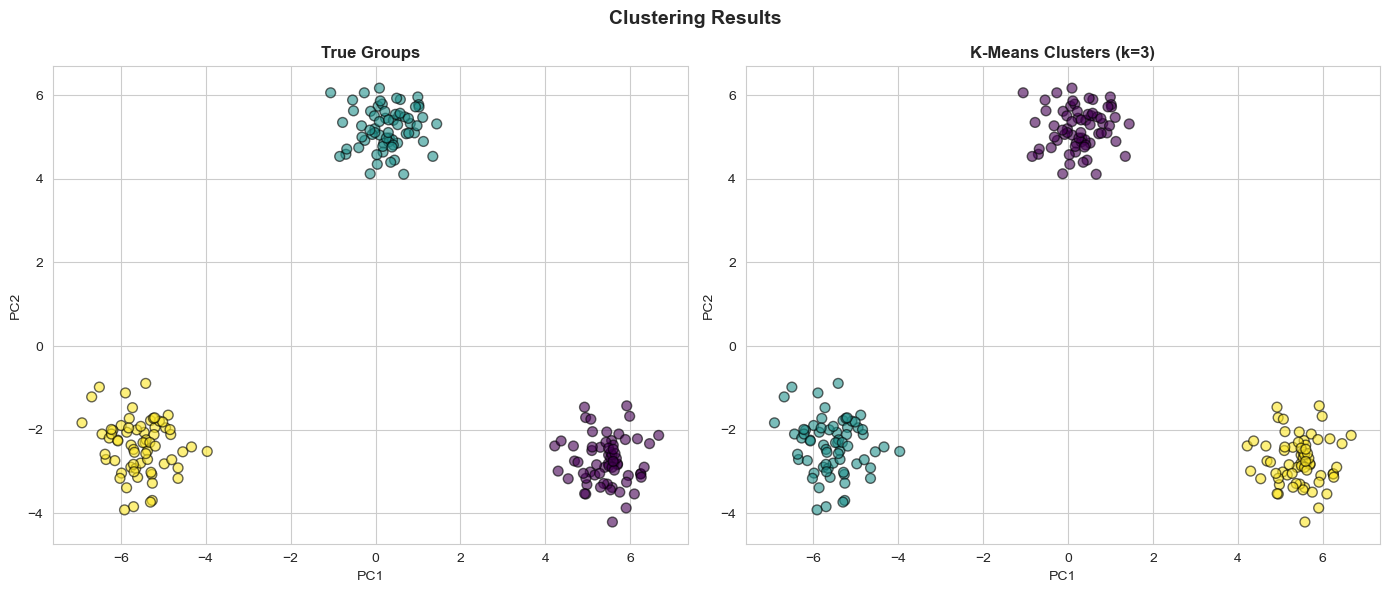

In [17]:
# Find optimal number of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, labels))

optimal_k = K_range[np.argmax(silhouette_scores)]

print(f"✓ Optimal clusters: {optimal_k}")
print(f"  Silhouette score: {max(silhouette_scores):.4f}")

# Apply K-Means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Compare with true labels
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"\n📊 Clustering Quality:")
print(f"  Adjusted Rand Index: {ari:.4f}")
print(f"  Normalized Mutual Info: {nmi:.4f}")
print(f"\n💡 Scores close to 1.0 indicate excellent clustering")

# Visualize clustering result
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, cmap='viridis',
               s=50, alpha=0.6, edgecolor='black')
axes[0].set_title('True Groups', fontsize=12, weight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis',
               s=50, alpha=0.6, edgecolor='black')
axes[1].set_title(f'K-Means Clusters (k={optimal_k})', fontsize=12, weight='bold')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

plt.suptitle('Clustering Results', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

---

# 🤖 **SECTION 6: Reinforcement Learning Basics**

**Reinforcement Learning** is fundamentally different:
- Agent learns by trial and error
- Receives rewards/penalties for actions
- Goal: Learn optimal policy

**Simple Example:** Drug dosage optimization
- **States:** Patient severity (Low, Medium, High)
- **Actions:** Dosage (Low, Medium, High)
- **Reward:** Treatment effectiveness

✅ Q-Learning agent trained!

Learned Q-Table:
                 Low Dose  Medium Dose  High Dose
Low Severity         0.00          0.0       0.00
Medium Severity      3.66         10.0      -3.73
High Severity        0.00          0.0       0.00

💡 Optimal Policy (best action per state):
  Low severity → Low dose
  Medium severity → Medium dose
  High severity → Low dose


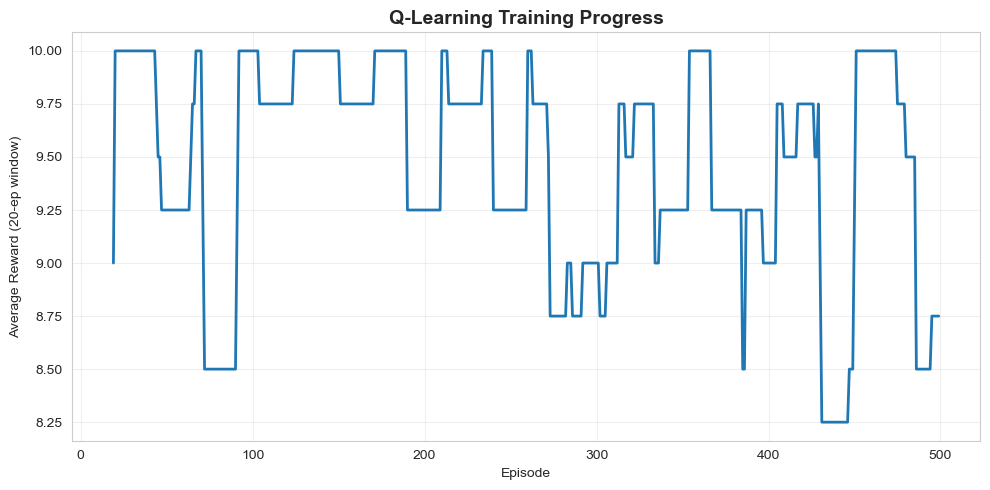

In [18]:
# Simple Q-Learning demonstration
class SimpleTreatmentEnv:
    def __init__(self):
        self.state = 1  # Medium severity
    
    def reset(self):
        self.state = 1
        return self.state
    
    def step(self, action):
        # Reward: matching action to state is good
        reward = 10 if action == self.state else -5
        # Transition: good treatment improves condition
        self.state = max(0, self.state - 1) if action >= self.state else self.state
        done = (self.state == 0)
        return self.state, reward, done

# Train Q-Learning agent
def q_learning_simple(episodes=500):
    env = SimpleTreatmentEnv()
    Q = np.zeros((3, 3))  # 3 states × 3 actions
    rewards_history = []
    
    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        
        for step in range(10):
            # Epsilon-greedy
            if np.random.random() < 0.1:
                action = np.random.randint(3)
            else:
                action = np.argmax(Q[state, :])
            
            next_state, reward, done = env.step(action)
            
            # Q-learning update
            Q[state, action] += 0.1 * (reward + 0.95 * np.max(Q[next_state, :]) - Q[state, action])
            
            total_reward += reward
            state = next_state
            
            if done:
                break
        
        rewards_history.append(total_reward)
    
    return Q, rewards_history

Q_table, rewards = q_learning_simple(500)

print("✅ Q-Learning agent trained!")
print("\nLearned Q-Table:")
print(pd.DataFrame(Q_table.round(2), 
                  columns=['Low Dose', 'Medium Dose', 'High Dose'],
                  index=['Low Severity', 'Medium Severity', 'High Severity']))

print("\n💡 Optimal Policy (best action per state):")
for state, name in enumerate(['Low', 'Medium', 'High']):
    action = np.argmax(Q_table[state])
    print(f"  {name} severity → {['Low', 'Medium', 'High'][action]} dose")

# Visualize learning
plt.figure(figsize=(10, 5))
plt.plot(pd.Series(rewards).rolling(20).mean(), linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Average Reward (20-ep window)')
plt.title('Q-Learning Training Progress', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

# 🎓 **FINAL SUMMARY & KEY TAKEAWAYS**

## ✅ **What You've Accomplished**

Congratulations! You've completed a comprehensive ML training covering:

### **1. Exploratory Data Analysis**
- ✓ Understanding data distributions
- ✓ Identifying correlations
- ✓ Visualizing relationships

### **2. Classification (7 algorithms)**
- ✓ Logistic Regression, Decision Tree, Random Forest
- ✓ KNN, SVM, Naive Bayes, Gradient Boosting
- ✓ Metrics: Accuracy, Precision, Recall, F1, ROC-AUC
- ✓ Confusion matrix interpretation

### **3. Regression (7 algorithms)**
- ✓ Linear, Ridge, Lasso
- ✓ Decision Tree, Random Forest, KNN, SVR
- ✓ Metrics: RMSE, MAE, R²

### **4. Unsupervised Learning**
- ✓ PCA for dimensionality reduction
- ✓ K-Means clustering
- ✓ Cluster evaluation

### **5. Reinforcement Learning**
- ✓ Q-Learning basics
- ✓ Agent training
- ✓ Policy optimization

## 💡 **Critical Takeaways for Biomedical ML**

### **1. Choose the Right Metric**

| Medical Scenario | Best Metric | Why? |
|-----------------|------------|------|
| Cancer Screening | **Recall** | Don't miss sick patients! |
| Confirmatory Test | **Precision** | Avoid false alarms |
| Balanced Diagnosis | **F1-Score** | Balance both |
| Drug Dosing | **MAE/RMSE** | Interpretable units |

### **2. Handle Imbalanced Data**
- Use stratified train-test split ✅
- Consider SMOTE for minority oversampling
- Focus on F1/ROC-AUC, not just accuracy
- Adjust classification thresholds

### **3. Validate Rigorously**
- Cross-validation (k-fold)
- Held-out test set
- Temporal validation for time-series
- External validation (different hospitals)

### **4. Interpret Your Models**
- Feature importance for tree models
- SHAP values for complex models
- Always validate with domain experts
- Regulatory approval requires interpretability

### **5. Ethics & Privacy**
- HIPAA/GDPR compliance mandatory
- Get proper ethical approval
- Consider algorithmic fairness
- Be transparent about limitations

## 🚀 **Next Steps in Your Journey**

### **Immediate Practice:**
1. Modify hyperparameters and observe changes
2. Try different train-test split ratios
3. Add new features to datasets
4. Experiment with ensemble methods

### **Intermediate Projects:**
1. Work with real medical datasets (UCI, Kaggle, PhysioNet)
2. Implement SMOTE for imbalanced data
3. Build complete ML pipelines
4. Create model interpretation visualizations

### **Advanced Topics:**
1. Deep Learning (Neural Networks, CNNs, RNNs)
2. Model interpretability (SHAP, LIME)
3. AutoML and hyperparameter optimization
4. Deployment (Flask API, Docker)

### **Recommended Resources:**

**Books:**
- "Hands-On Machine Learning" - Aurélien Géron
- "Pattern Recognition and ML" - Christopher Bishop

**Online:**
- Andrew Ng's ML Course (Coursera)
- Fast.ai Practical Deep Learning
- Kaggle Learn & Competitions

**Datasets:**
- UCI ML Repository
- Kaggle Medical Datasets
- PhysioNet Challenge Data

## 🎉 **Congratulations!**

You've completed comprehensive ML training for biomedical applications!

**Remember:**
- Start simple, add complexity gradually
- Data quality > Model complexity
- Always validate rigorously
- Interpret and explain your models
- Consider clinical context
- Prioritize patient safety

**Keep Learning!** Machine Learning is rapidly evolving. Stay curious, practice regularly, and never stop experimenting!

---

### 📧 **Questions or Feedback?**
- Review sections you found challenging
- Experiment with the code
- Join ML communities online
- Build your own projects

**Good luck on your Machine Learning journey!** 🚀🔬📊

---

*Machine Learning for Biomedical Students*  
*Last Updated: February 2026*